In [165]:
import numpy as np
np.random.seed(42)
import sklearn
import os

import keras
import pickle

from keras.layers.advanced_activations import LeakyReLU 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, Conv2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils

import pandas as pd
% matplotlib inline

import matplotlib

import matplotlib.pyplot as plt
import random
import csv
from sklearn.utils import shuffle
from tensorflow.contrib.layers import flatten
from skimage import transform as transf
from sklearn.model_selection import train_test_split
import cv2
from prettytable import PrettyTable
%matplotlib inline

SEED = 22

In [166]:
# Load pickled data
import pickle
from sklearn.model_selection import train_test_split

def load_data():
    training_file = "data/train.p"
    validation_file= "data/valid.p"
    testing_file = "data/test.p"

    with open(training_file, mode='rb') as f:
        train = pickle.load(f)
    with open(validation_file, mode='rb') as f:
        valid = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)
        
    X_train, y_train = train['features'], train['labels']
    X_valid, y_valid = valid['features'], valid['labels']
    X_test, y_test = test['features'], test['labels']

    assert(len(X_train) == len(y_train))
    assert(len(X_valid) == len(y_valid))
    assert(len(X_test) == len(y_test))
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

X_train, y_train, X_valid, y_valid, X_test, y_test = load_data()
print("data loaded")


data loaded


In [167]:

### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# Number of training examples
n_train = len(X_train)

# Number of validation examples.
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# The shape of an traffic sign image
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = len(np.bincount(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)



Number of training examples = 39209
Number of validation examples = 12630
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [254]:
def get_num_instances(img_class, y):
    """
    Return the number of instances for 'img_class' in dataset 'y'
    """
    y_hist = np.bincount(y)
    n_instances = y_hist[img_class]
    return n_instances

def get_class_images(img_class, X, y,count=0):
    """
    Return a list containing all of the images of class 'img_class', 
    from dataset X
    """
    n_instances = get_num_instances(img_class, y)
    if (count < n_instances and count > 0):
        n_instances = count
        print(n_instances)   
    class_images = []
    i = 0
    while n_instances>0:
        if y[i] == img_class:
            image = X[i].squeeze()
            class_images.append(image)
            n_instances -= 1
        i += 1
    return class_images
class_imgs = get_class_images(0,X_train, y_train,20)
#class_mgs = get_class_images(0,X_train, y_train)


20


In [255]:
print(len(class_imgs))

20


In [170]:
def get_class_set_images(img_classes, X, y, count=-1):
    classes_imgs = []
    print(type(img_classes))
    print(len(img_classes))
    print(img_classes[1])
    print(img_classes)
    for i  in range(len(img_classes)) :
        class_imgs = get_class_images(img_classes[i],X,y)
        print(len(class_imgs))
        print(type(class_imgs))

        classes_imgs.extend(class_imgs)
    return classes_imgs
        
classes_imgs = get_class_set_images((0,42), X_train, y_train)  
print(len(classes_imgs))        
    

<class 'tuple'>
2
42
(0, 42)
210
<class 'list'>
240
<class 'list'>
450


In [235]:
def plot_image(image, nr, nc, i, label=""):
    """
    Plot a single image.
    If 'i' is greater than 0, then plot this image as 
    a subplot of a larger plot.
    """
    #fig = plt.figure(figsize=(8, 20))

    
    if i>0: 
        plt.subplot(nr, nc, i)
    else:
        figsize = nr*3,nc*3
        plt.figure(figsize=figsize)
        print(figsize)
    #plt.figure(figsize=(nr,nc))

    plt.xticks(())
    plt.yticks(())
    plt.xlabel(label)
    plt.tight_layout()
    plt.imshow(image, cmap="gray")
    #plt.imshow(image)

    

In [229]:
import math

def plot_images(img_class, images, ncol, desc):
    """
    Plot all of the images in the list 'class_images'
    """
    nimages = len(images)
    nrow = math.ceil(nimages/ncol)
    #plt.figure(figsize=(6, 4))
    print("class {} has {} images in the {} dataset".format(img_class,nimages, desc))
    for image,i in zip(images, range(nimages)):
        plot_image(image, nrow, ncol, i)

(4, 9)


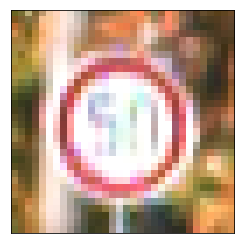

In [209]:
plot_image(X_train[3000],2,3,0)

class 0 has 20 images in the  dataset


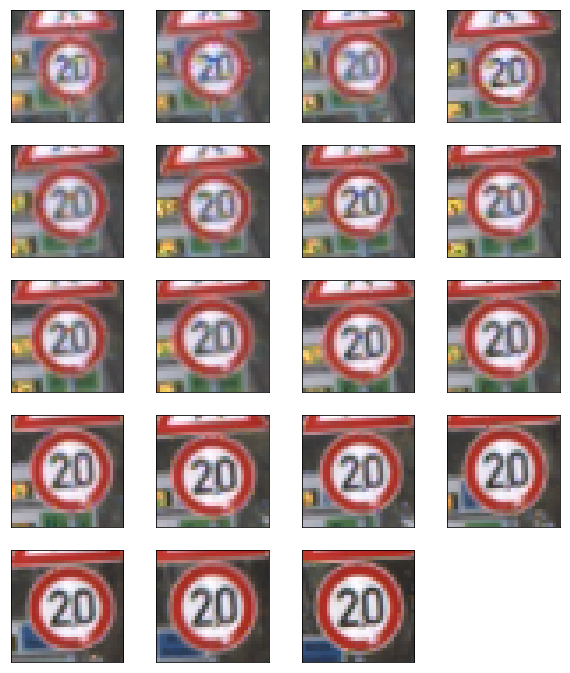

In [174]:
plot_images(0,class_mgs,4,"")

In [175]:

# Convert to grayscale
def convert_to_grayscale(dataset):
    dataset_rgb = dataset
    dataset_gry = np.sum(dataset/3, 
                     axis=3, keepdims=True)
    print('RGB shape:', dataset_rgb.shape)
    print('Grayscale shape:', dataset_gry.shape)
     assert(dataset_gry.shape[1:] == (32,32,1)), "The dimensions of the images are not 32 x 32 x 1."
    return dataset_gry

IndentationError: unexpected indent (<ipython-input-175-a0dcd063914e>, line 9)

In [328]:

def gray_expand_dims_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = np.expand_dims(img, axis=2)
    #img = np.resize(img, (img.shape[0], img.shape[1], 1))
    print(img.shape)
    return  img

def conv_to_grayscale_img(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = np.expand_dims(img, axis=2)
    #img = np.resize(img, (img.shape[0], img.shape[1], 1))
    print(img.shape)
    return  img


def conv_to_grayscale(data):
    
    """Convert to grayscale, histogram equalize, and expand dims"""
    
    print(type(data))
    print(data.shape)

    imgs = np.ndarray((data.shape[0], 32, 32, 1), dtype=np.uint8)
    for i, img in enumerate(data):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = np.expand_dims(img, axis=2)
        #print(img.shape)

        imgs[i] = img
    #print(type(imgs))
    return imgs
x_prep = conv_to_grayscale(X_train[0:3])



#X_test_ = preprocess(X_test)
 

    


<class 'numpy.ndarray'>
(3, 32, 32, 3)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
class 11 has 4 images in the  dataset
(3, 12)


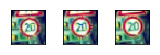

In [264]:
def preprocess_img(img):
    
    """Convert to grayscale, histogram equalize, and expand dims"""
    
    print(img.shape)

    
    
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    print(img.shape)
    return img

#X_train_preprocess = preprocess(X_train[0:4])
#plot_images(11,X_train[0:4],4,"")
#plot_images(11,X_train_preprocess,4,"")
#X_test_ = preprocess(X_test)


def preprocess(data):
    
    """Convert to grayscale, histogram equalize, and expand dims"""
    
    print(type(data))

    imgs = np.ndarray((data.shape[0], 32, 32, 1), dtype=np.uint8)
    for i, img in enumerate(data):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = cv2.equalizeHist(img)
        img = np.expand_dims(img, axis=2)
        imgs[i] = img
    print(type(imgs))
    return imgs

X_train_preprocess = preprocess(X_train[0:4])
plot_images(11,X_train[0:4],4,"")
#plot_images(11,X_train_preprocess,4,"")
#X_test_ = preprocess(X_test)


In [310]:
def normalize (dataset, mean, std):
    dataset = (dataset - mean) / std
    print("Dataset length: ", len(dataset))
   
    return dataset

def center_normalize(data, mean, std):
    """Center normalize images"""
    data = data.astype('float32')
    data -= mean
    data /= std
    return data


def center_normalize_img(img, mean, std):
    """Center normalize images"""
    img = img.astype('float32')
    img -= mean
    img /= std
    return img

mean = np.mean(X_train)
std = np.std(X_train)

X_train_normalize = center_normalize(X_train, mean, std)
#X_test_normalize = center_normalize(X_test, mean, std)


In [ ]:
# Shuffle the data

X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)
X_val, y_val = shuffle(X_val, y_val, random_state = 42)
    

In [ ]:
# One-hot encode labels
y_train = np_utils.to_categorical(y_train,num_classes=43)
y_test = np_utils.to_categorical(y_test, num_classes=43)
y_val = np_utils.to_categorical(y_val, num_classes=43)


In [14]:
X_train_p = preprocess(X_train)
X_train_n= center_normaize(X_train_p, mean, std)
X_train_originalGray = convert_to_grayscale(X_train)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [16]:
print(X_train[0][0][0])
print(X_train_preprocess[0][0][0])
print(X_train_normalize[0][0][0])
print(X_train_n[0][0][0])


[75 78 80]
[17]
[-0.1110231  -0.06757014 -0.0386015 ]
[-0.95111364]


In [ ]:
def preprocess_data(X_dataset):

    X_dataset = convert_to_grayscale(X_dataset)
    
    #Histogram Equilization
    
    
    # Normalise data
    X_dataset = (X_dataset - X_dataset.mean()) / (np.max(X_dataset) - np.min(X_dataset))
    print("Dataset length: ", len(X_dataset))
   
    return X_dataset

NameError: name 'convert_to_grayscale' is not defined

In [124]:

class_images = get_class_images(11, X_train, y_train)


class 11 has 100 images in the  dataset
185.604003906
13.3190917969
56.3143310547


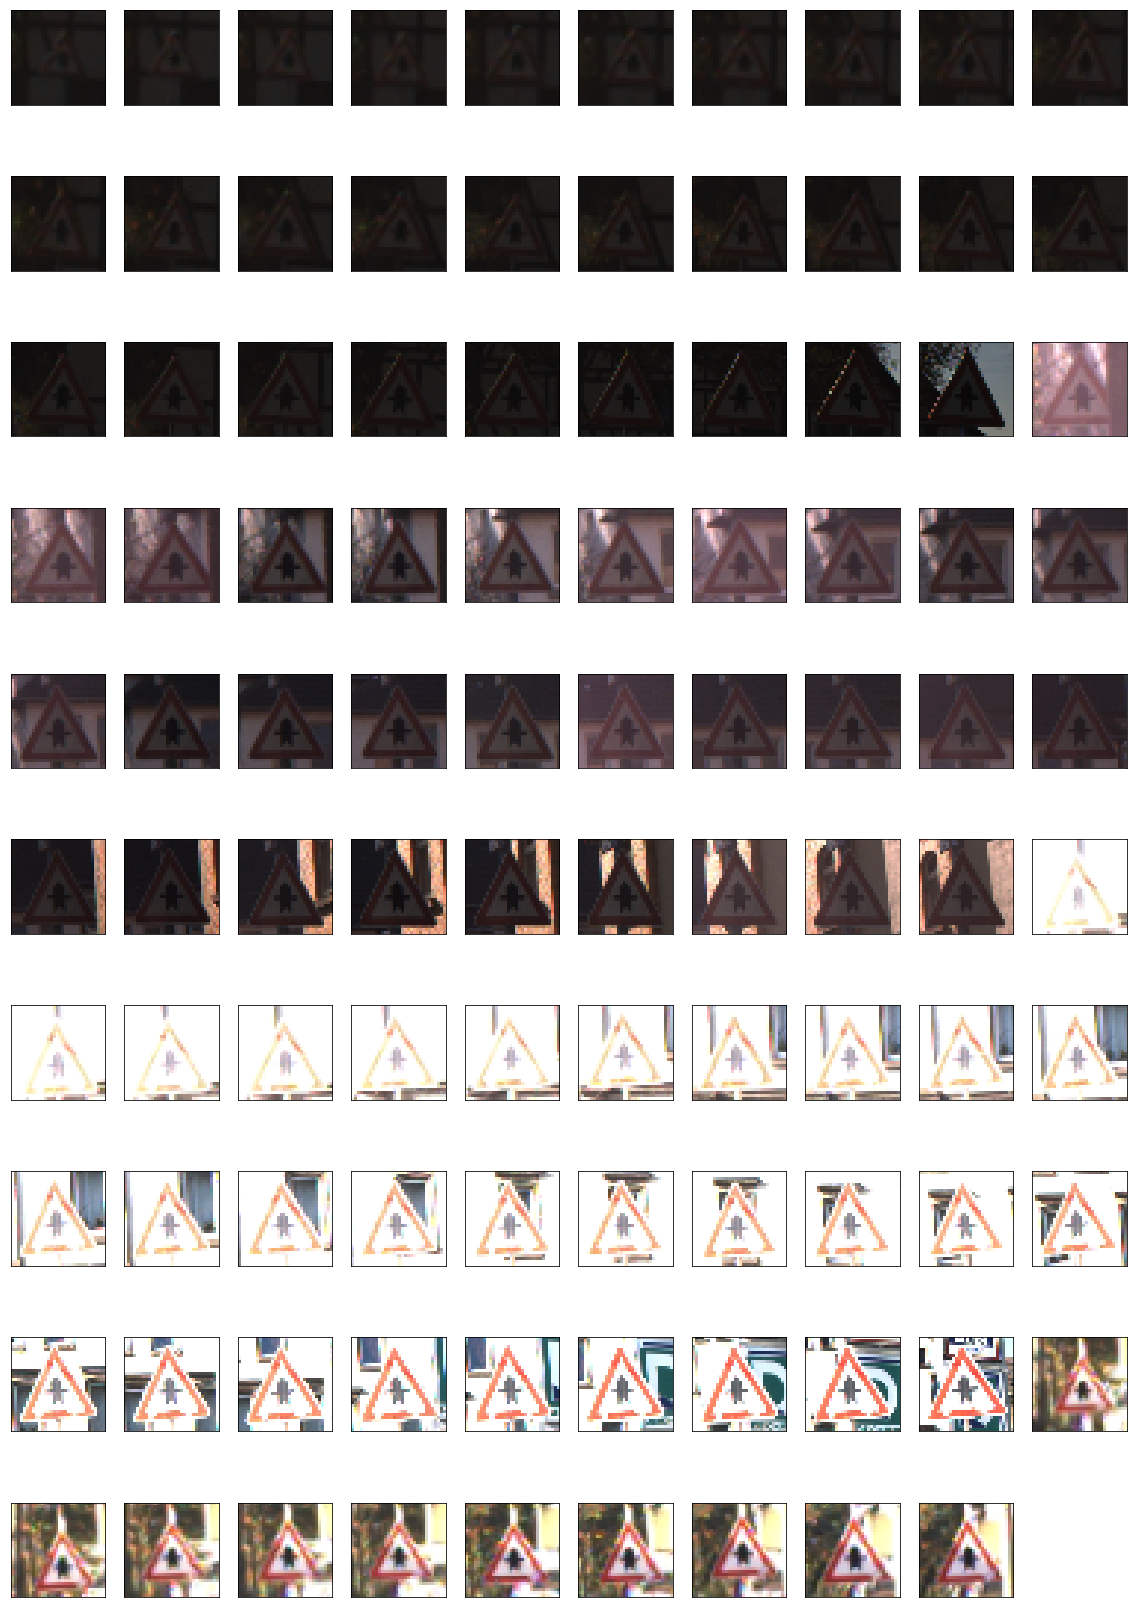

In [156]:
channel_means = []
plot_dark = []
plot_bright =[]
plot_images(11,class_images[0:100],10,"")
for i in range(100):
    #print(i)
    mean_val = cv2.mean(class_images[i])
    channel_mean = np.average(mean_val)
    #print(mean_val)
    #print(channel_mean)
    if (channel_mean < 50):
        plot_dark.append(class_images[i])
    else:
        plot_bright.append(class_images[i])
        
    channel_means.append(channel_mean)
print(max(channel_means))
print(min(channel_means))
print(np.median(channel_means))
    #mean_x = cv2.mean(X_train[i])

    
    

class 11 has 48 images in the  dataset
(7, 7)


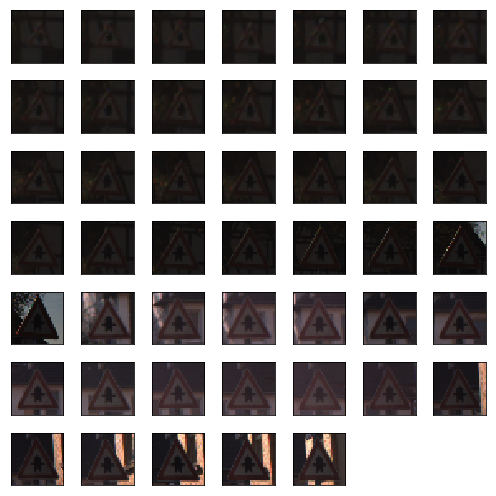

In [222]:
plot_images(11,np.asarray(plot_dark),7,"")


class 11 has 52 images in the  dataset
(24, 21)


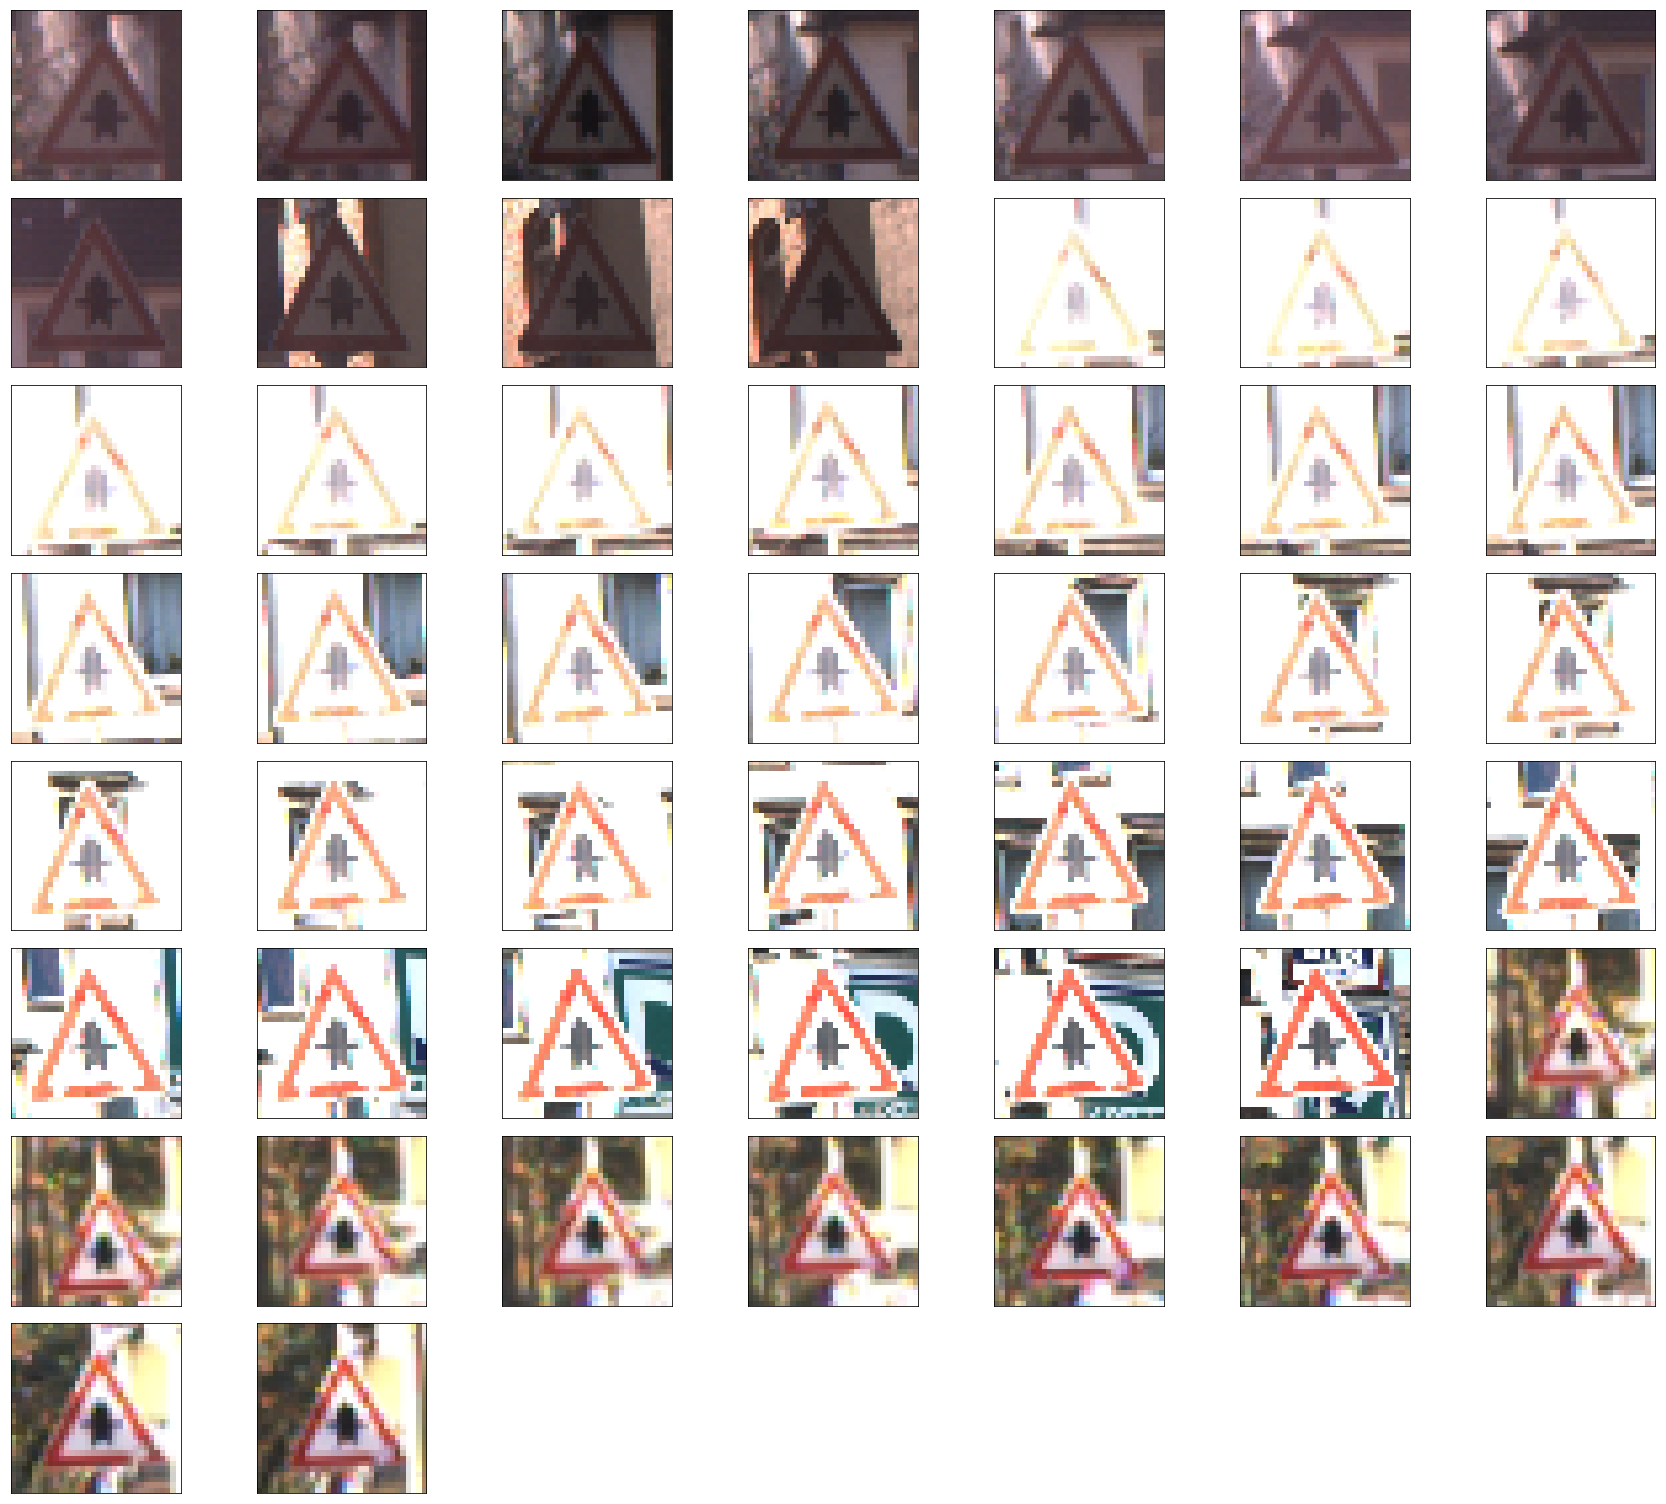

In [236]:
plot_images(11,np.asarray(plot_bright),7,"")


<class 'numpy.ndarray'>
(48, 32, 32, 3)
(48, 32, 32, 1)
class 11 has 48 images in the  dataset
(21, 21)


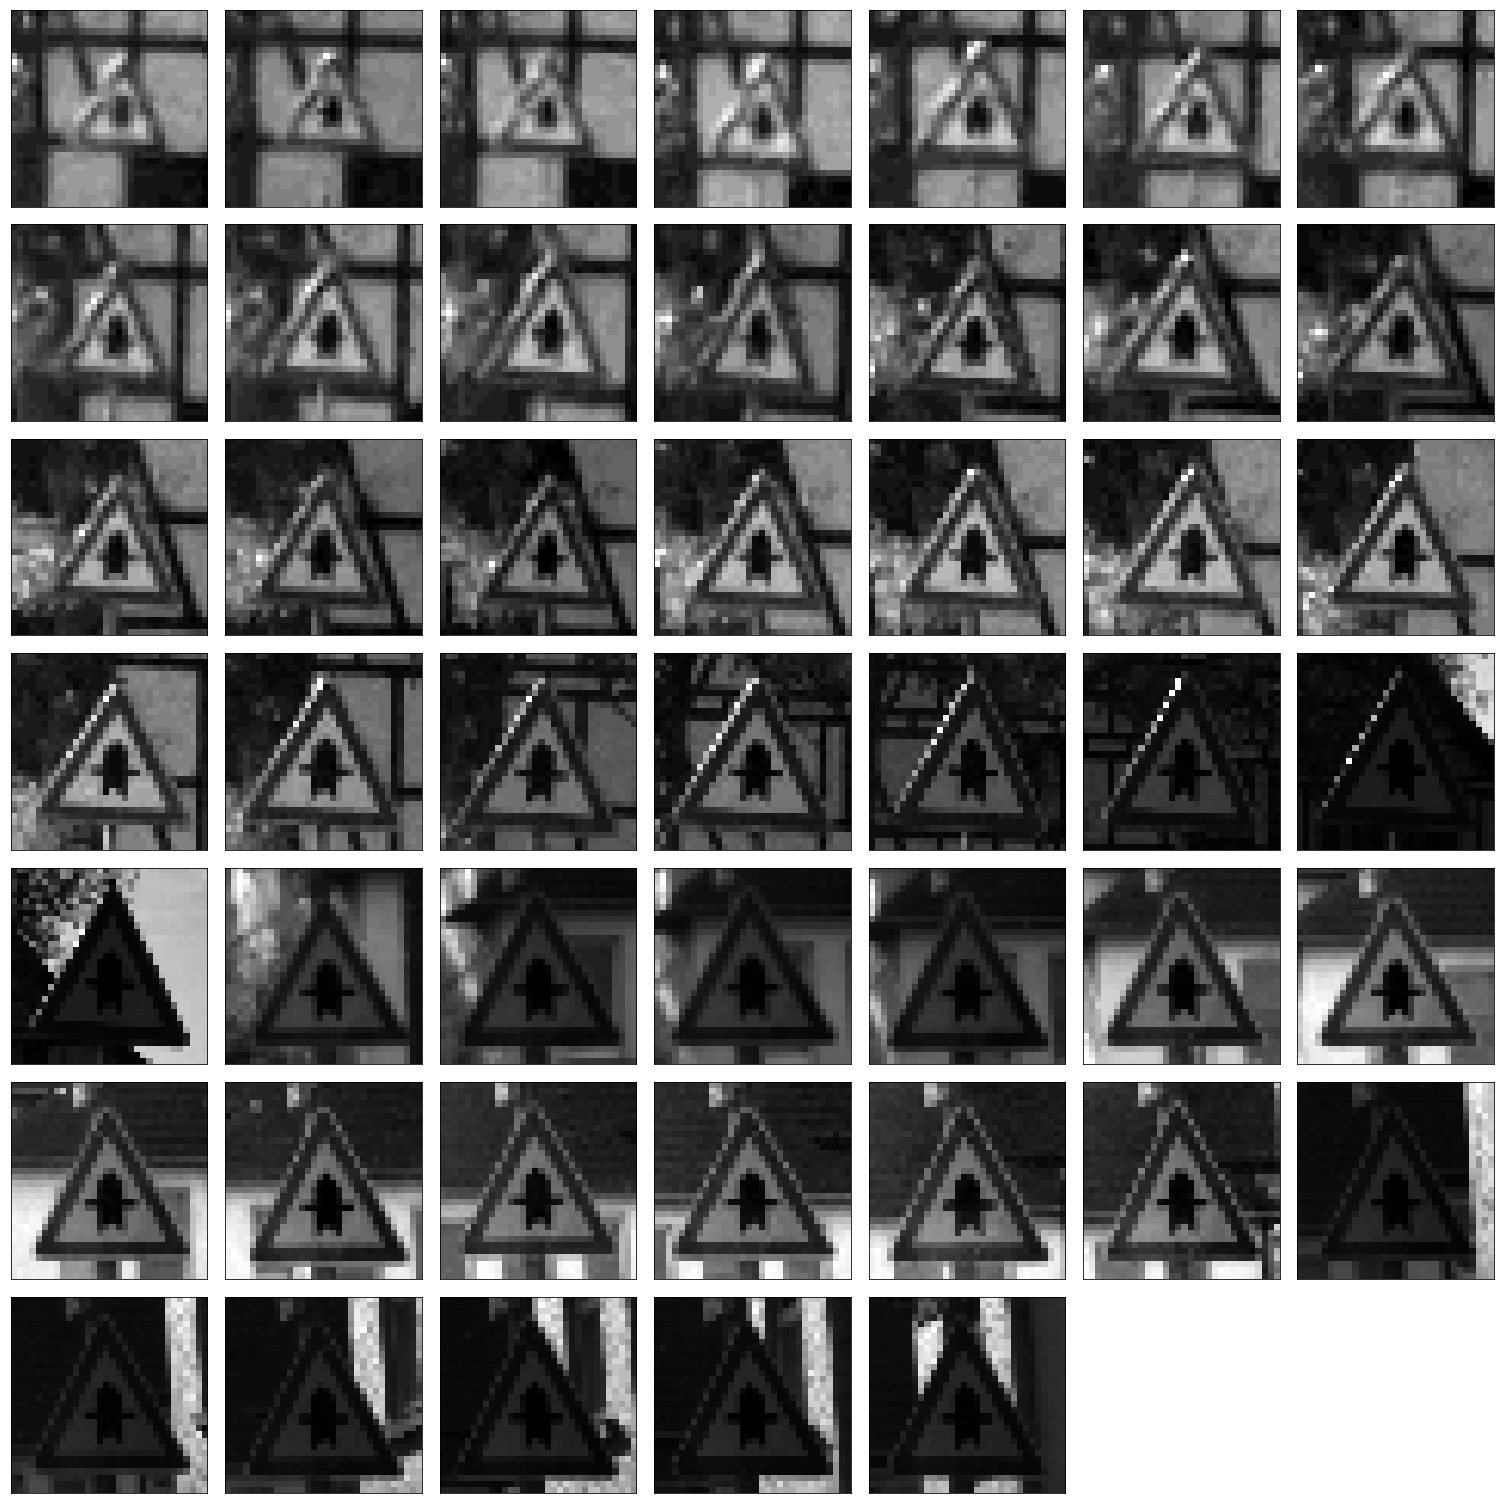

In [242]:
#dark = preprocess(np.asarray(X_train[0:4]))

dark = conv_to_grayscale(np.asarray(plot_dark))
#dark = preprocess(np.asarray(plot_dark))
print(dark.shape)
plot_images(11,dark.reshape(dark.shape[0:3]),7,"")


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(48, 32, 32, 1)
class 11 has 48 images in the  dataset
(21, 21)


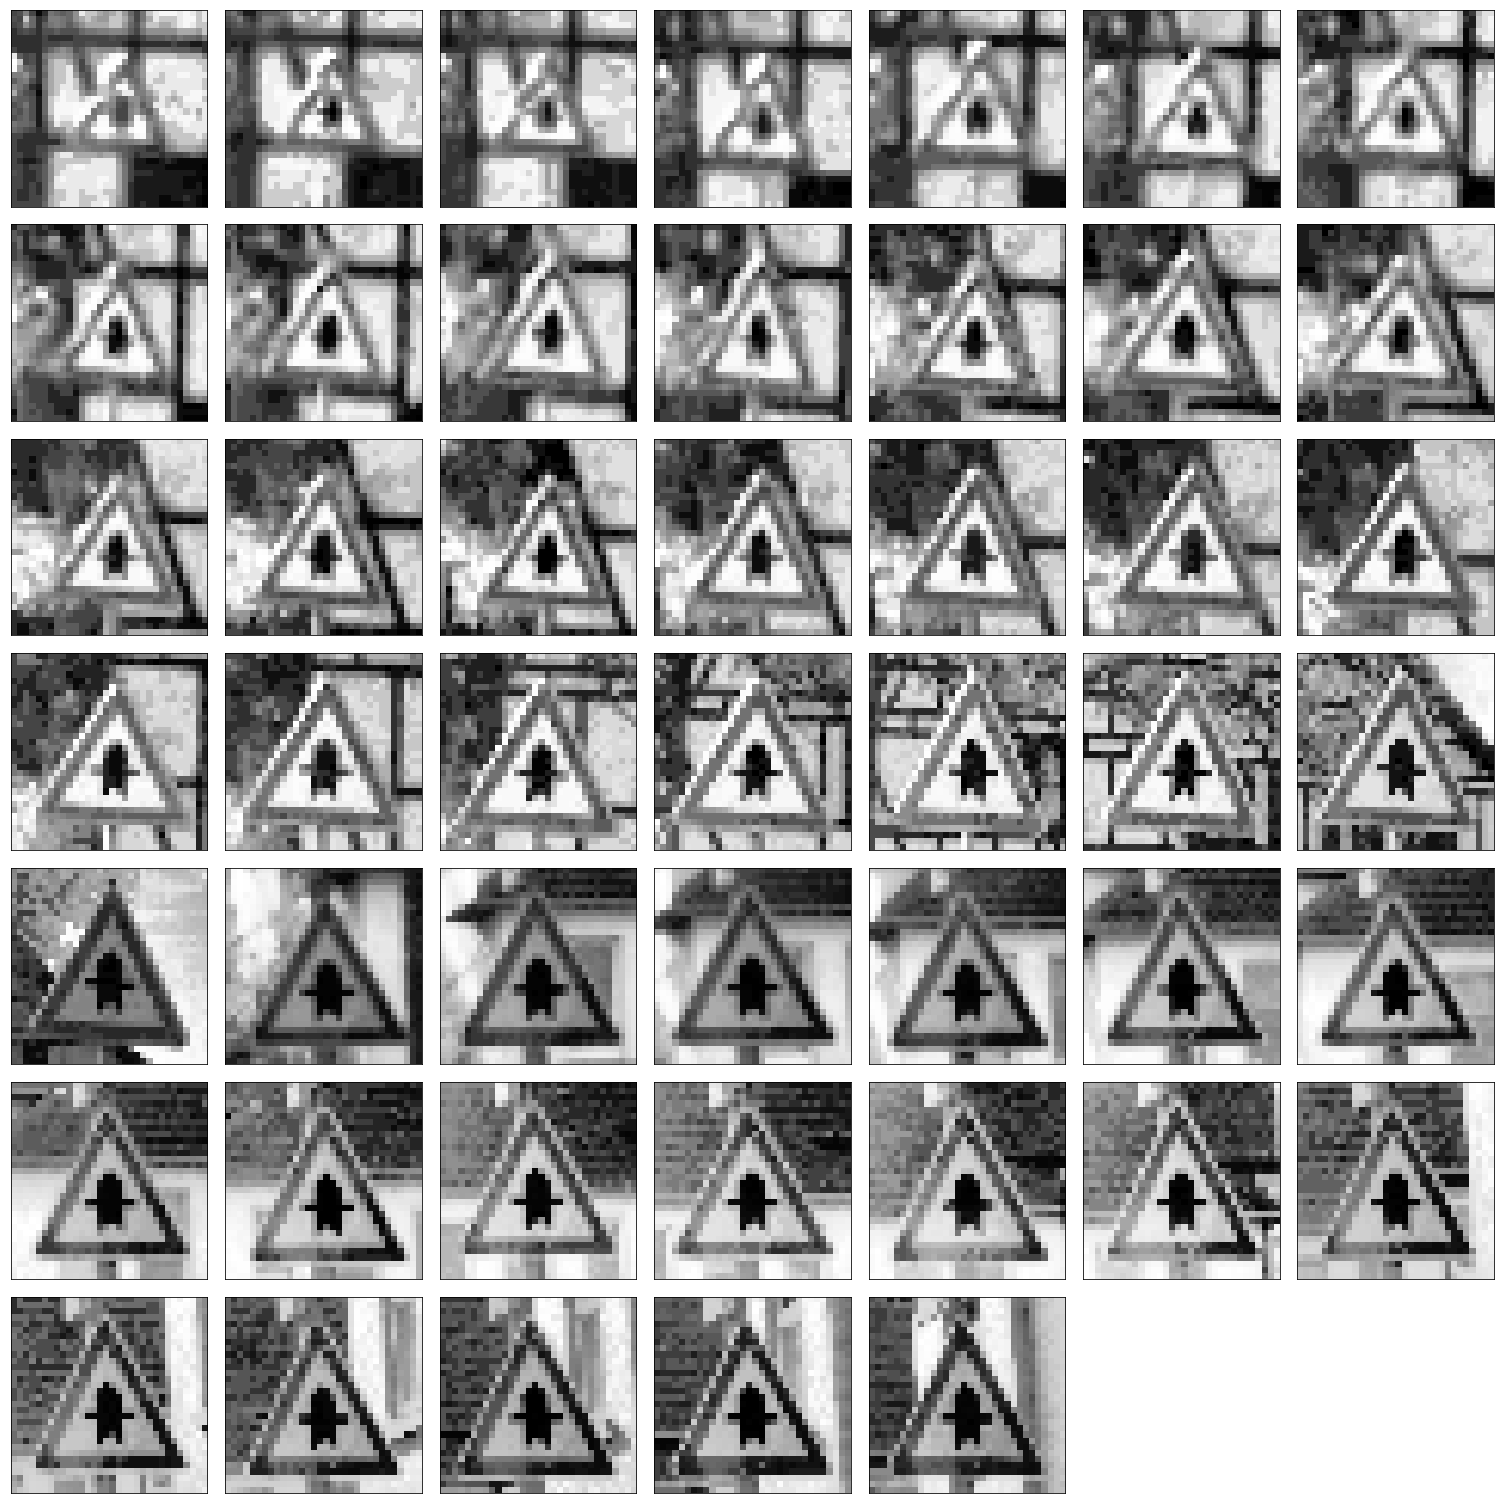

In [244]:
#dark = preprocess(np.asarray(X_train[0:4]))

#dark = conv_to_grayscale(np.asarray(plot_dark))
dark = preprocess(np.asarray(plot_dark))
print(dark.shape)
plot_images(11,dark.reshape(dark.shape[0:3]),7,"")


class 11 has 48 images in the  dataset
(21, 21)


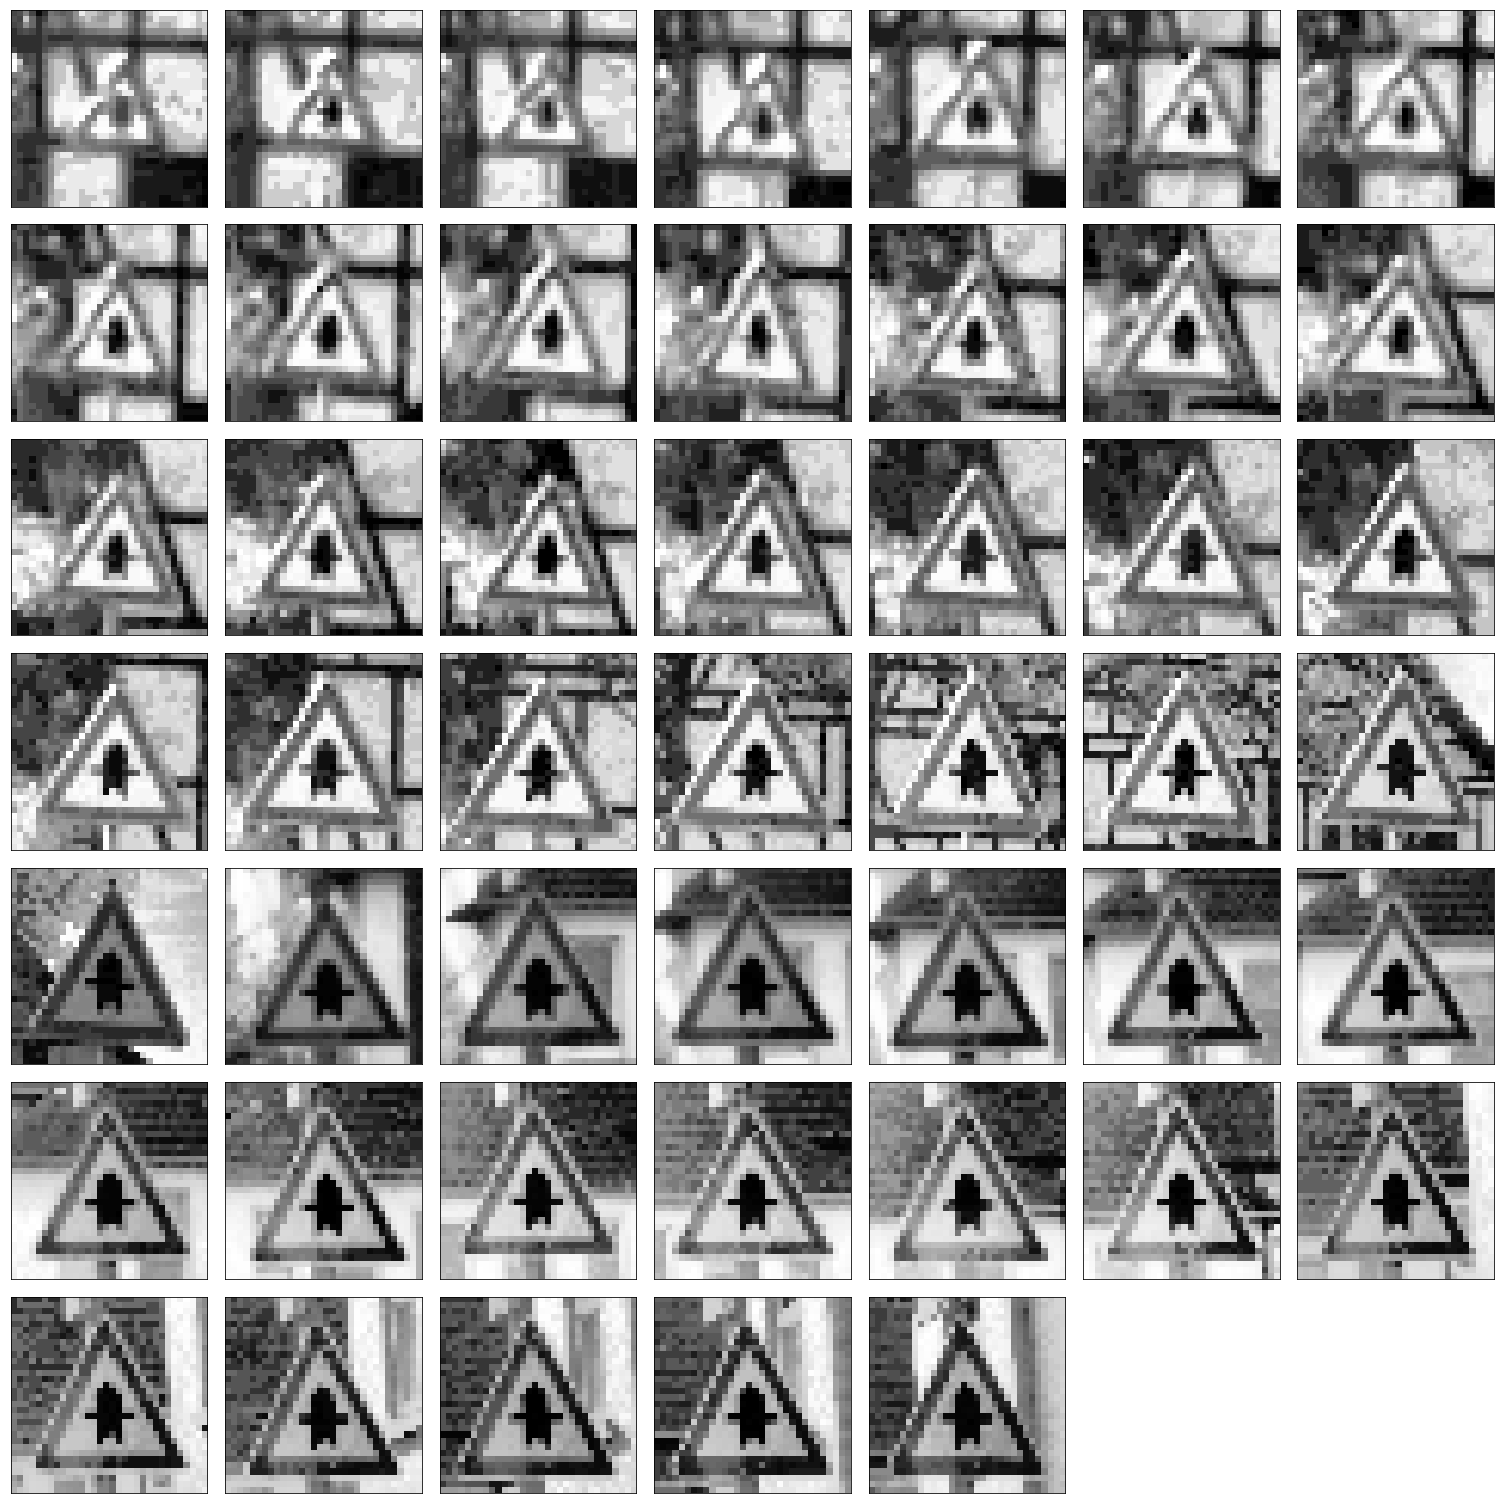

In [248]:
normalize = center_normaize(np.asarray(plot_dark),mean, std)
plot_images(11,dark.reshape(dark.shape[0:3]),7,"")


<class 'numpy.ndarray'>
(52, 32, 32, 3)
(52, 32, 32, 1)
class 11 has 52 images in the  dataset
(24, 21)


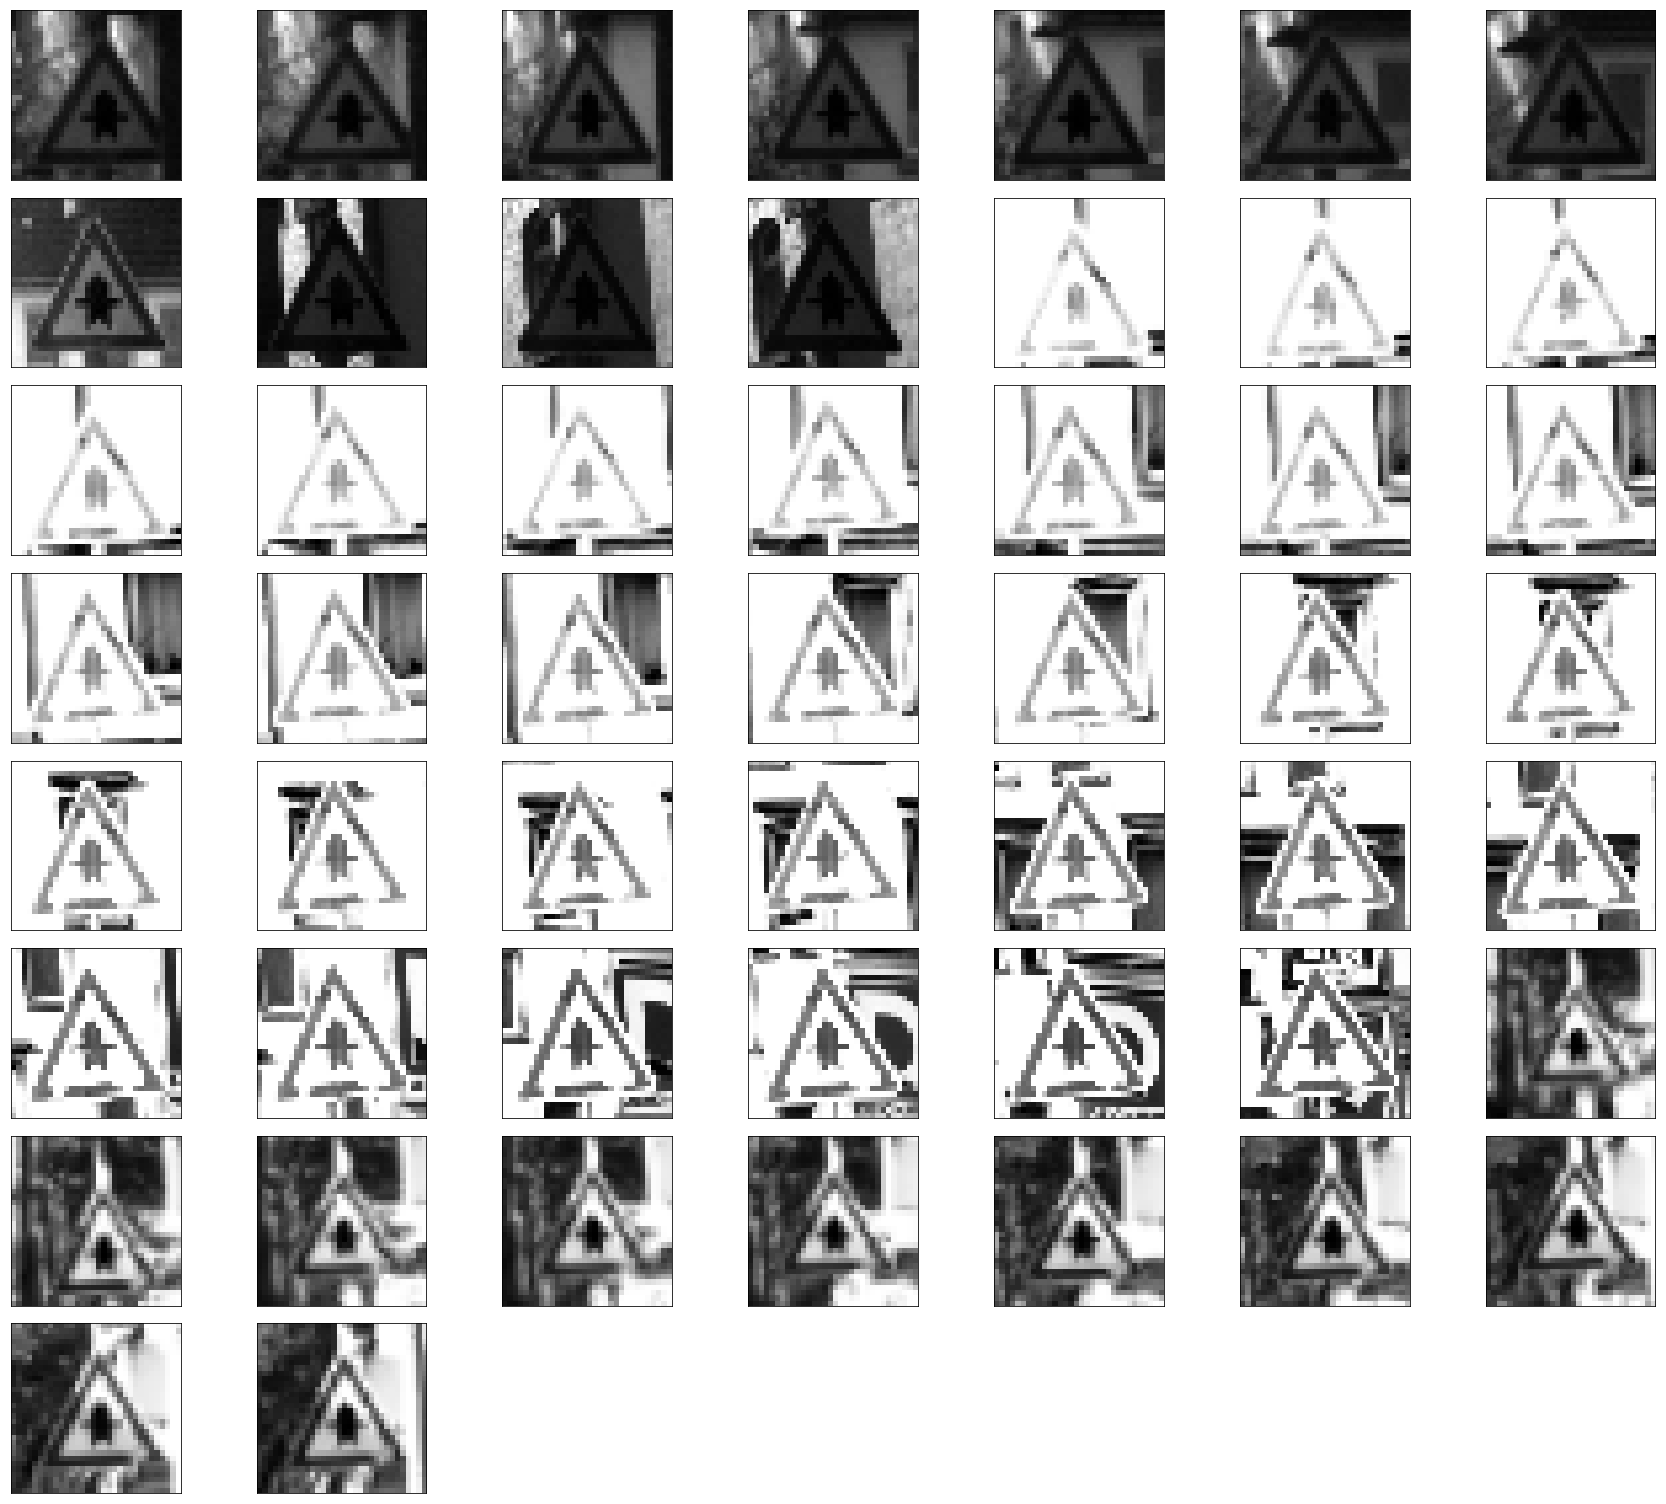

In [243]:
bright = conv_to_grayscale(np.asarray(plot_bright))
#dark = preprocess(np.asarray(plot_dark))
print(bright.shape)
plot_images(11,bright.reshape(bright.shape[0:3]),7,"")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(52, 32, 32, 1)
class 11 has 52 images in the  dataset
(24, 21)


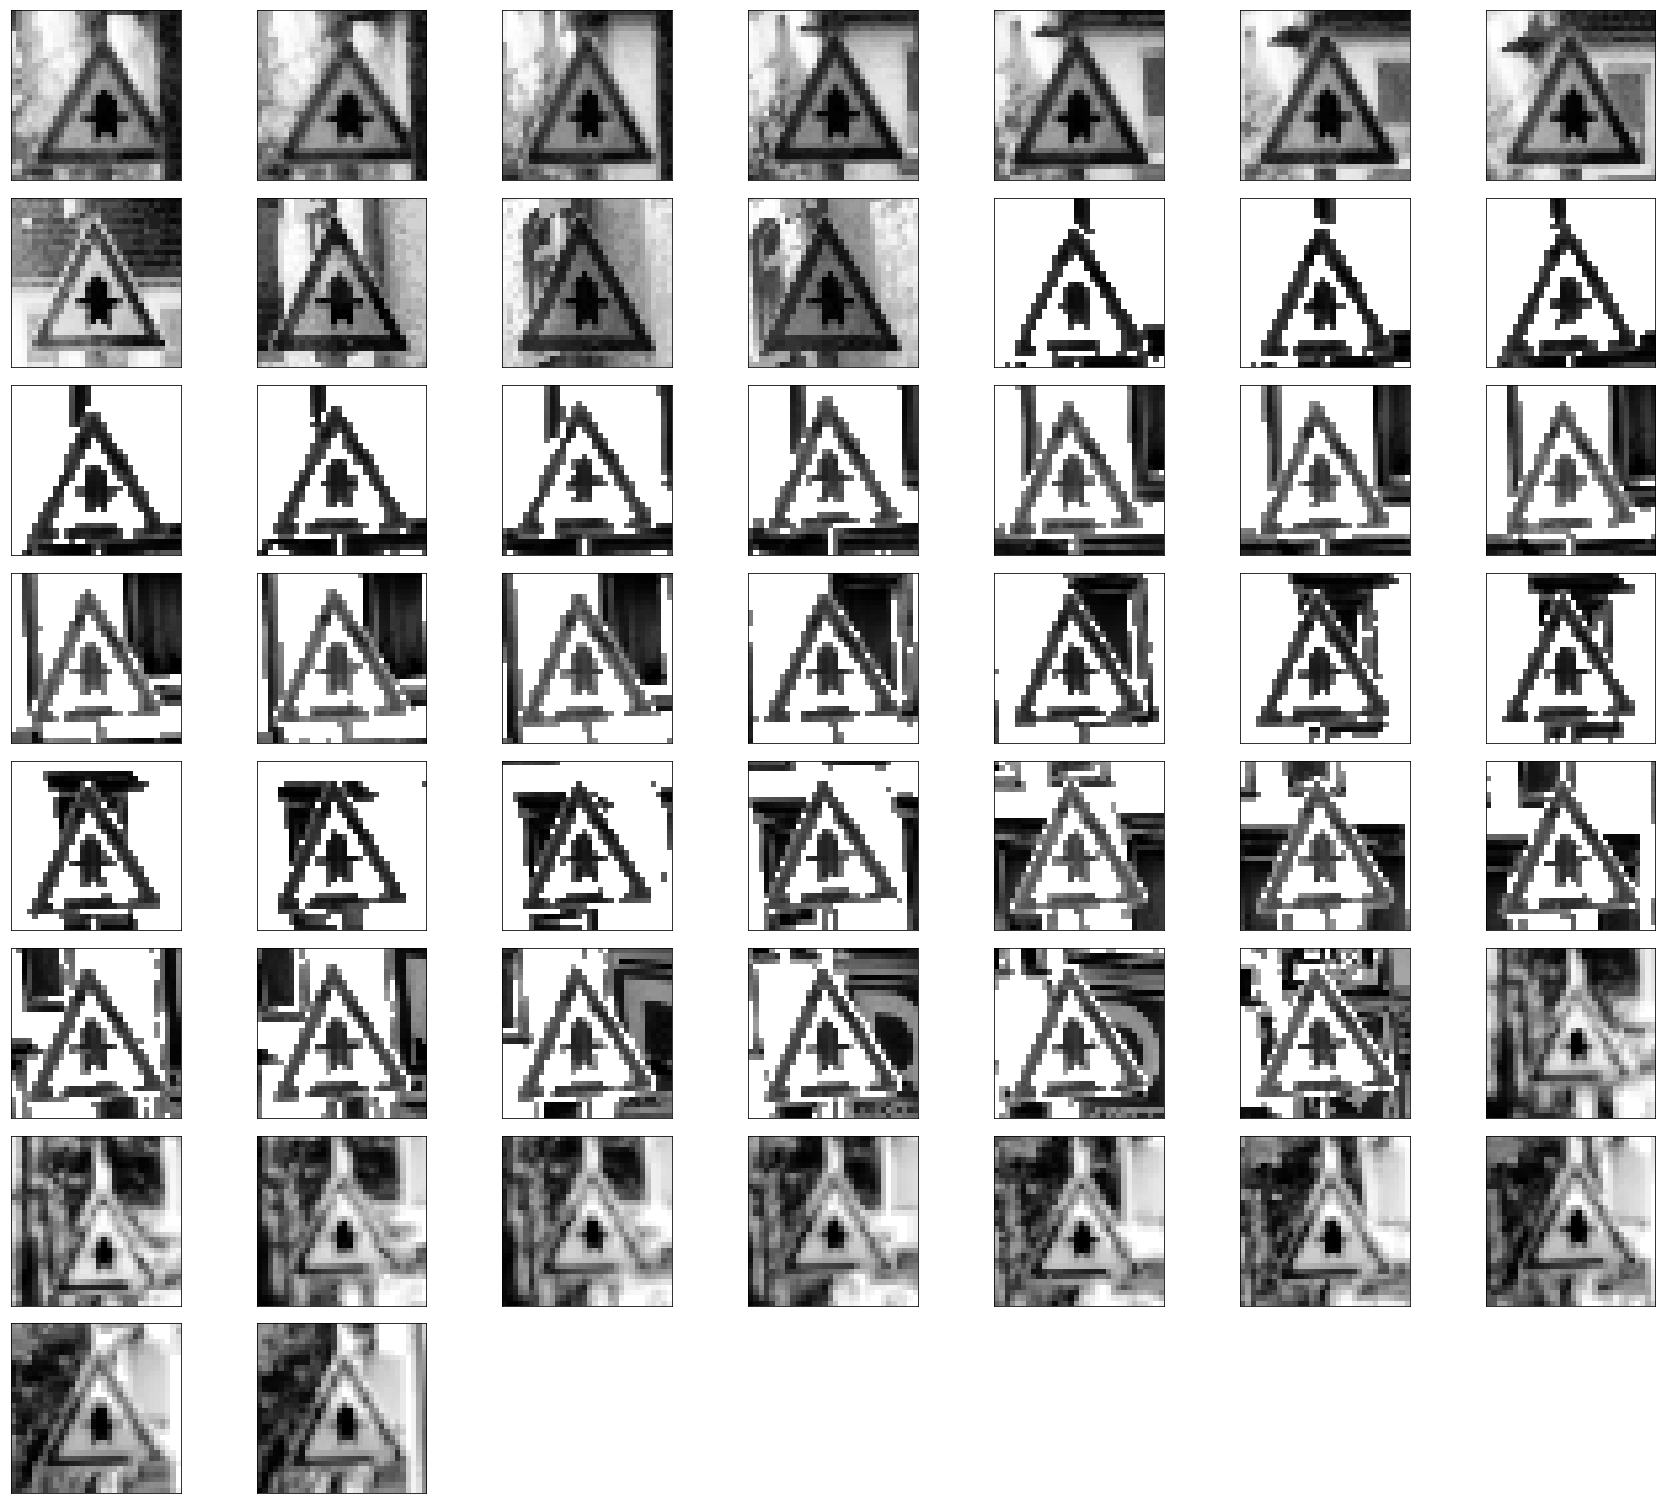

In [245]:
bright = preprocess(np.asarray(plot_bright))
#dark = preprocess(np.asarray(plot_dark))
print(bright.shape)
plot_images(11,bright.reshape(bright.shape[0:3]),7,"")

[[[ 0.83042741  0.337984    0.41040215]
  [ 0.94629645  0.42488578  0.5407548 ]
  [ 1.09113276  0.61317295  0.78697652]
  ..., 
  [ 0.59868932  0.1931477   0.30901673]
  [ 0.62765658  0.17866407  0.2945331 ]
  [ 0.58420569  0.14969681  0.28004947]]

 [[ 1.84428155  1.4387399   1.2794199 ]
  [ 2.07601953  1.00423098  1.03319824]
  [ 1.45322347  0.65662384  0.83042741]
  ..., 
  [ 0.61317295  0.17866407  0.28004947]
  [ 0.59868932  0.16418044  0.28004947]
  [ 0.56972206  0.14969681  0.2945331 ]]

 [[ 2.24982309  1.69944525  1.20700181]
  [ 2.46707773  1.23596907  1.16355097]
  [ 1.52564168  0.70007473  0.8738783 ]
  ..., 
  [ 0.58420569  0.17866407  0.28004947]
  [ 0.62765658  0.22211497  0.30901673]
  [ 0.56972206  0.17866407  0.28004947]]

 ..., 
 [[ 0.8738783   0.39591852  0.45385304]
  [ 1.04768193  0.59868932  0.64214021]
  [ 1.00423098  0.5407548   0.56972206]
  ..., 
  [ 0.65662384  0.22211497  0.35246763]
  [ 0.64214021  0.1931477   0.2945331 ]
  [ 0.58420569  0.13521318  0.22211

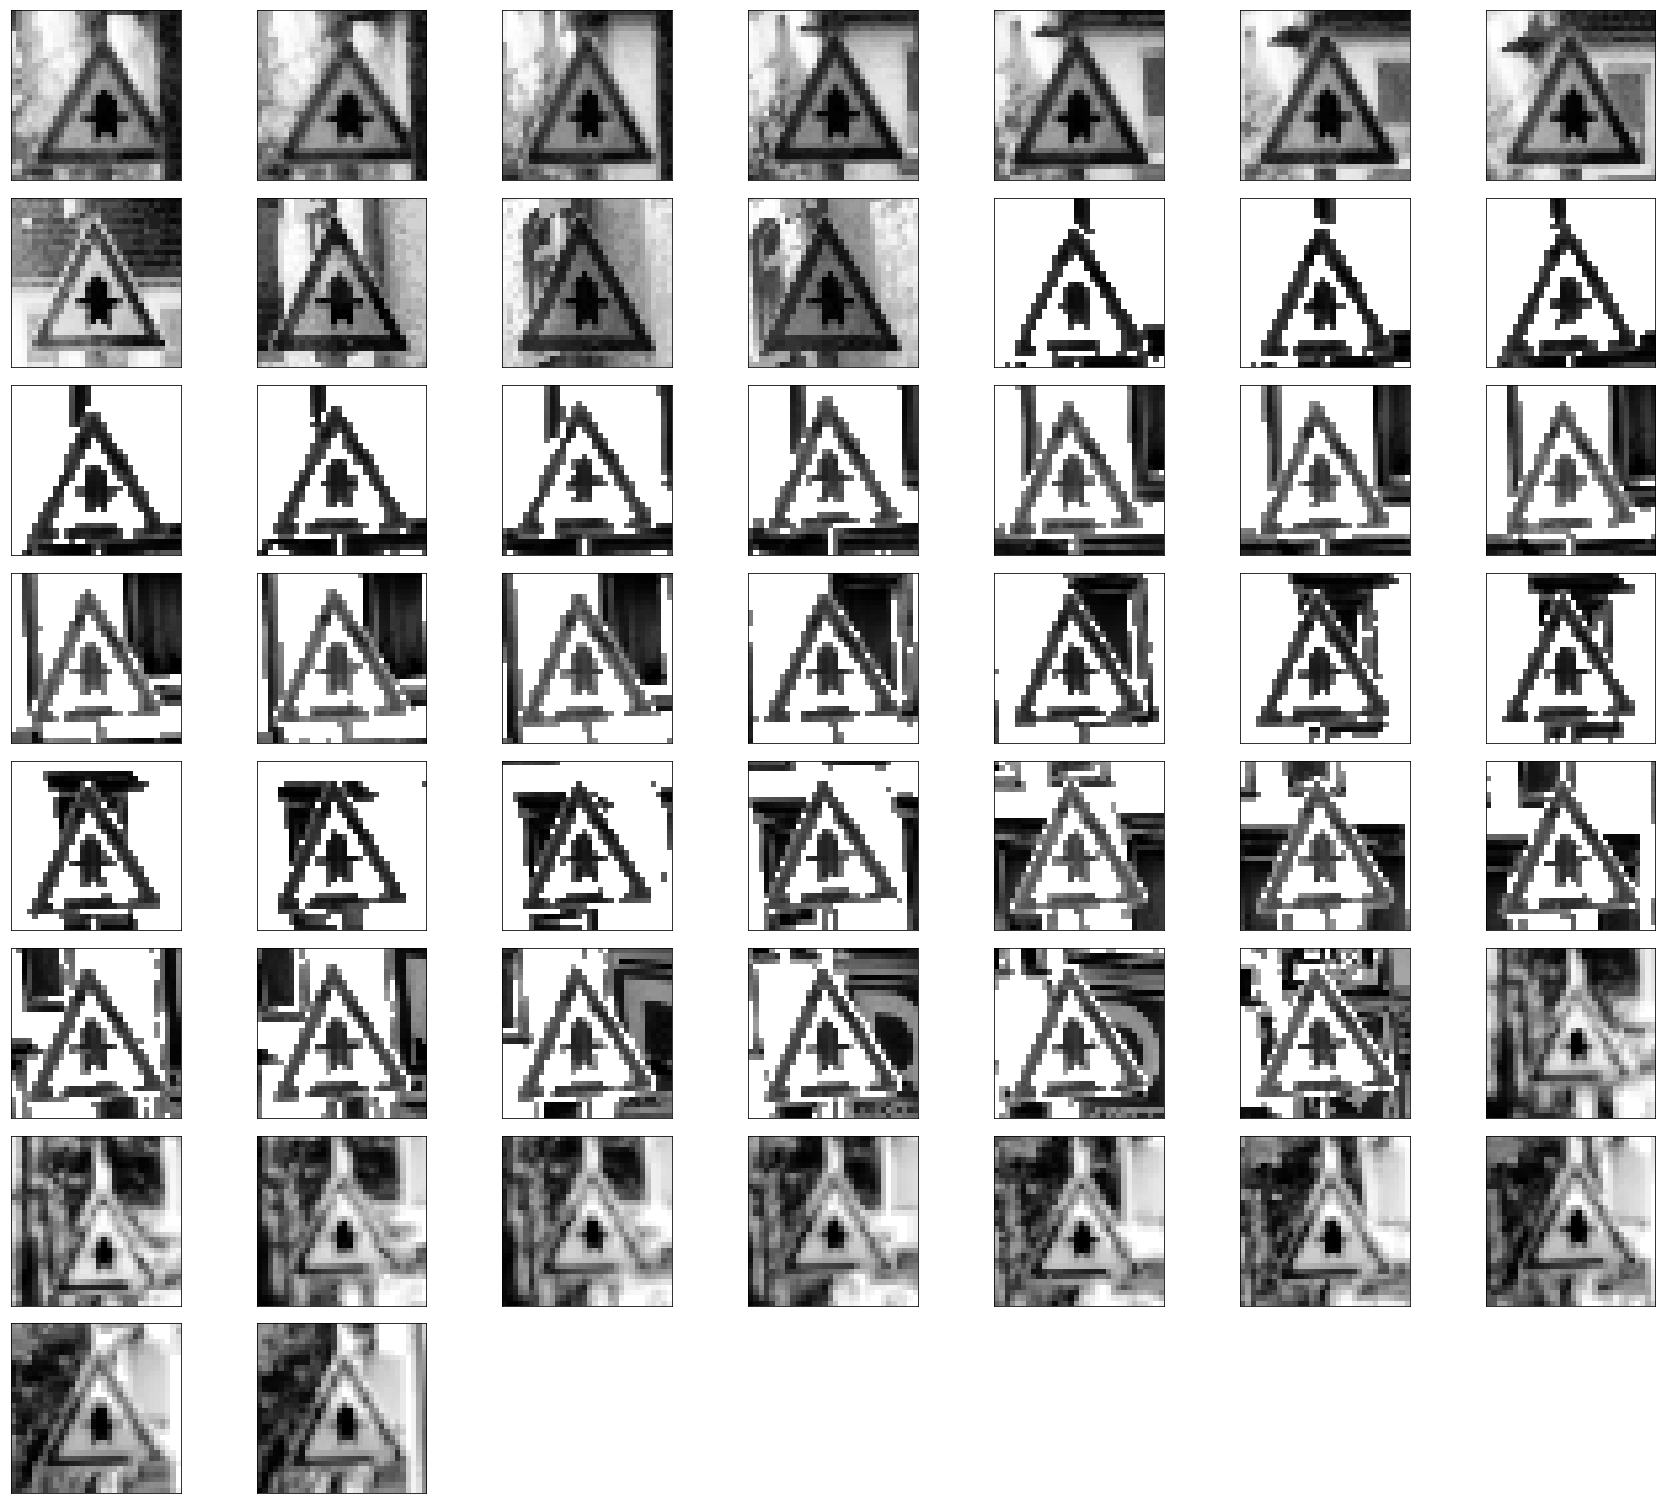

In [312]:
normalize = center_normalize(np.asarray(plot_bright),mean, std)
print (normalize[0])
print(normalize.shape)
plot_images(11,bright.reshape(bright.shape[0:3]),7,"")

(3, 3)
(32, 32, 3)
(32, 32)
(3, 3)
(32, 32)
(32, 32, 3)
(32, 32)
(3, 3)
(32, 32)
(32, 32, 3)
(3, 3)


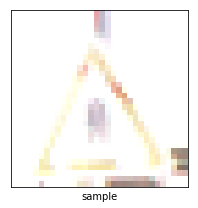

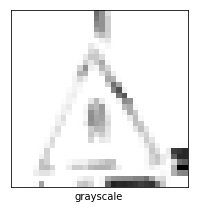

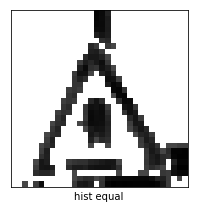

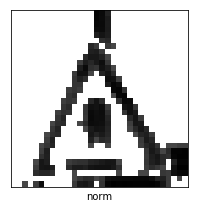

In [313]:
img_set = []
#sample = plot_dark[0]
sample = plot_bright[12]
plot_image(sample,1,1,0,"sample")
print(sample.shape)
gray = conv_to_grayscale_img(sample)
plot_image(gray,1,1,0,"grayscale")

print(gray.shape)

hist_equal = preprocess_img(sample)
plot_image(hist_equal,1,1,0,"hist equal")

print(hist_equal.shape)

norm_gray = center_normaize_img(hist_equal,mean, std)
norm_gray = norm_gray.reshape(32,32)
print(norm.shape)

plot_image(norm_gray,1,1,0,"norm")


#img_set.append(sample)
#img_set.append(gray)
#img_set.append(hist_equal)
#img_set.append(norm_gray.reshape(norm_gray.shape[0:2]))

#img_set = np.asarray(img_set)


#plot_images(11,img_set,3,"")


In [314]:
from skimage import data, img_as_float, exposure, io

def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()
    ax_img.set_adjustable('box-forced')

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

In [316]:
img = plot_dark[0]
print(img.shape)

(32, 32, 3)


In [317]:
matplotlib.rcParams['font.size'] = 10

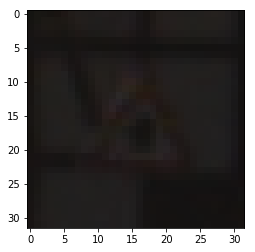

In [321]:
#plt.imshow(img)
plt.imshow(img_as_float(img))

(32, 32)
(3, 3)
(32, 32)
(3, 3)
(32, 32)
(32, 32, 1)
(32, 32, 1)


TypeError: Invalid dimensions for image data

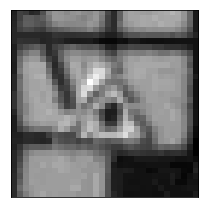

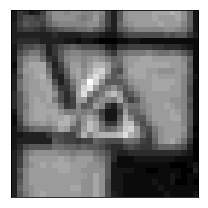

In [331]:
from skimage import color
gray_image = color.rgb2gray(img)
print(gray_image.shape)
plot_image(gray_image,1,1,0,"")
gray_img1 = conv_to_grayscale_img(img)
plot_image(gray_img1,1,1,0,"")
print(gray_image.shape)
gray_img2 = gray_expand_dims_img(img)
print(gray_img2.shape)
plt.imshow(gray_img2)



(32, 32, 3)
(32, 32)
(3, 3)


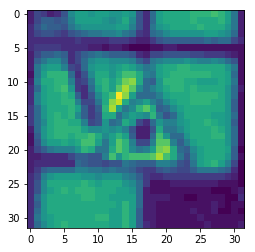

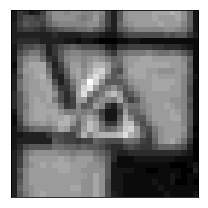

In [333]:
import cv2
print(img.shape)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image)
print(gray_image.shape)
plot_image(gray_image,1,1,0,"")


RGB shape: (32, 32, 3)
Grayscale shape: (32, 32, 1)
Grayscale shape: (32, 32)
(3, 3)


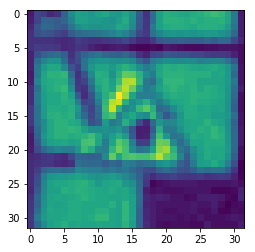

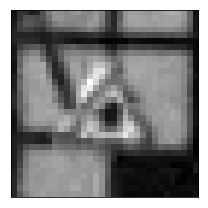

In [339]:

img_gry = np.sum(img/3, 
                     axis=2, keepdims=True)
print('RGB shape:', img.shape)
print('Grayscale shape:', img_gry.shape)
plt.imshow(img_gry.squeeze())
#plot_image(img_gry,1,1,0,"")
img_gry = np.sum(img/3, axis=2, keepdims=False)
print('Grayscale shape:', img_gry.shape)
plt.imshow(img_gry.squeeze())
plot_image(img_gry,1,1,0,"")    

(3, 3)


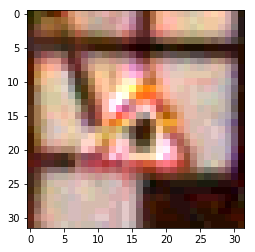

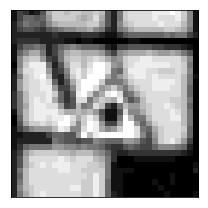

In [347]:
# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))
plt.imshow(img_as_float(img_rescale))

p2, p98 = np.percentile(gray_image, (2, 98))
img_rescale_gry = exposure.rescale_intensity(gray_image, in_range=(p2, p98))
plot_image(img_rescale_gry,1,1,0,"")

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


(3, 3)


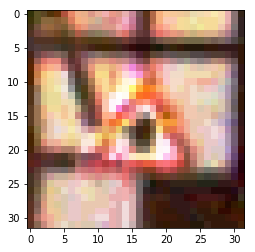

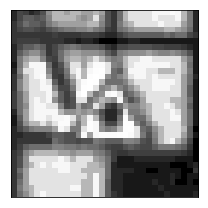

In [343]:
# Histogram Equalization
img_eq = exposure.equalize_hist(img)
plt.imshow(img_as_float(img_eq))

img_eq_gry = exposure.equalize_hist(gray_image)
plot_image(img_eq_gry,1,1,0,"")

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


(3, 3)


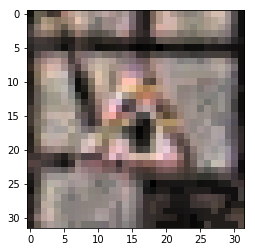

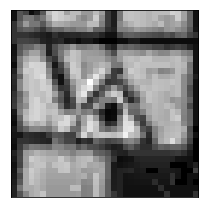

In [344]:
# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)
plt.imshow(img_as_float(img_adapteq))

img_adapteq_gry = exposure.equalize_adapthist(gray_image, clip_limit=0.03)

plot_image(img_adapteq_gry,1,1,0,"")

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


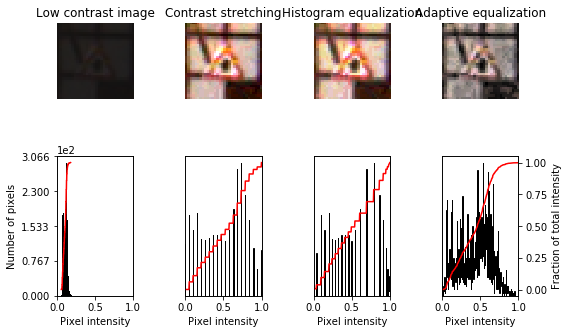

In [348]:
#### Everything below here is just to create the plot/graphs ####
# Display results
fig = plt.figure(figsize=(8, 5)) 
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)

for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
    
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')

ax_hist.set_yticks(np.linspace(0, y_max, 5))
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')
ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

C:\Users\Sarita Navuluru\Anaconda2\envs\tf_a\lib\site-packages\skimage\exposure\exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "


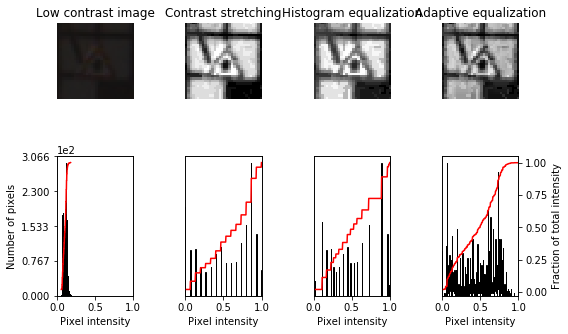

In [349]:
#### Everything below here is just to create the plot/graphs ####
# Display results
fig = plt.figure(figsize=(8, 5)) 
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)

for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
    
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')

ax_hist.set_yticks(np.linspace(0, y_max, 5))
ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale_gry, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq_gry, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq_gry, axes[:, 3])
ax_img.set_title('Adaptive equalization')
ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()